# Project Introduction: <br>

*Fill out an introduction that discusses the data you are analyzing, and the question or questions you are investigating* <br>

The data being analyzed pertains to COVID, Heart, and Stroke mortalities that will be filtered to focus on gender and ethnicities. And

## Any Changes: <br> 

*A discussion whether your scope has changed since the check-in
proposal slides. What did you aim to do that you will not do and what have you
added to the project?* <br>

We have not made any changes on our approach since our updated proposal. We have the same goals and scope of exploring and showing significant differences in mortality rates.

In [147]:
#Quiz Gods Link 
#https://github.com/uic-cs418/cs418-spring22-quiz-gods

### Cleaning Mortality Trend data ###
import pandas as pd
import numpy as np
import string
import seaborn as sns 
import matplotlib.pyplot as plt
from DFfunctions import *

covid = pd.read_csv('covid19mortality.csv')
heart = pd.read_csv('heartmortality.csv') #Year for every data observation is 2013
stroke = pd.read_csv('strokemortality.csv') #Year for every data observation is 2017

covid.head()

,Data as of,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino,Footnote
0,03/30/2022,01/01/2020,03/26/2022,2020-2022,NaN,By Total,United States,Count of COVID-19 deaths,630742.0,139867.0,10799.0,30750.0,2105.0,3721.0,158481.0,NaN
1,03/30/2022,01/01/2020,03/26/2022,2020-2022,NaN,By Total,United States,Distribution of COVID-19 deaths (%),64.4,14.3,1.1,3.1,0.2,0.4,16.2,NaN
2,03/30/2022,01/01/2020,03/26/2022,2020-2022,NaN,By Total,United States,Unweighted distribution of population (%),59.7,12.6,0.7,5.9,0.2,2.3,18.6,NaN
3,03/30/2022,01/01/2020,03/26/2022,2020-2022,NaN,By Total,United States,Weighted distribution of population (%),40.8,13.5,0.4,9.6,0.2,2.2,33.4,NaN
4,03/30/2022,01/01/2020,12/31/2020,2020,NaN,By Year,United States,Count of COVID-19 deaths,232835.0,61541.0,4615.0,13592.0,695.0,1144.0,69474.0,NaN


In [148]:
#Drop columns that are not necessary for analysis
useCols = []
data = {}
for col in covid.columns:
    if col != 'Year' and col != 'Footnote':
        data[col] = covid[col]
coviddf = pd.DataFrame(data) 
coviddf.head()

heartNotUsed = ['Year','LocationDesc', 'DataSource','Class','Topic','Data_Value_Unit',
                   'Data_Value_Type','Data_Value_Footnote_Symbol', 'StratificationCategory1',
                   'StratificationCategory2', 'TopicID', 'LocationID','Location 1','GeographicLevel']
heartCols = []
heartData = {}
for col in heart.columns:
    if col not in heartNotUsed:
        heartData[col] = heart[col]
heartDf = pd.DataFrame(heartData)
heartDf.head()

strokeNotUsed = ['Year','LocationDesc','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                     'StratificationCategory1','Data_Value_Footnote_Symbol'
                     ,'StratificationCategory2','TopicID','LocationID','Y_lat','X_lon','GeographicLevel']
stokeCols = []
strokeData = {}
for col in stroke.columns:
    if col not in strokeNotUsed:
        strokeData[col] = stroke[col]
strokeDf = pd.DataFrame(strokeData)
strokeDf.head()

,LocationAbbr,Data_Value,Data_Value_Footnote,Stratification1,Stratification2
0,AK,2.0,NaN,Overall,Overall
1,AK,0.0,NaN,Overall,Overall
2,AK,67.2,NaN,Overall,Overall
3,AK,104.6,NaN,Overall,Overall
4,AK,NaN,Insufficient Data,Overall,Overall


In [149]:
#We want data analysis to be easy to process and less time to take, so let's clarify some column values and
#create a legend key to shorten the column values to look through the dataset
coviddf = coviddf.rename(columns = {'Non-Hispanic White':'W', 'Non-Hispanic Black or African American': 'B/AA',
                       'Non-Hispanic American Indian or Alaska Native':'AIAN', 'Non-Hispanic Asian':'A',
                        'Non-Hispanic Native Hawaiian or Other Pacific Islander': 'NH/OPI',
                        'Non Hispanic more than one race': 'MultipleRaces', 'Hispanic or Latino' : 'H/L'})

heartDf = heartDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                               ,'Stratification1': 'Gender', 'Stratification2': 'Race/Ethnicity'})

strokeDf = strokeDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                                 ,'Stratification1': 'Gender','Stratification2': 'Race/Ethnicity'})

strokeDf.head()

,LocationAbbr,"Deaths per 100,000",Sufficiency?,Gender,Race/Ethnicity
0,AK,2.0,NaN,Overall,Overall
1,AK,0.0,NaN,Overall,Overall
2,AK,67.2,NaN,Overall,Overall
3,AK,104.6,NaN,Overall,Overall
4,AK,NaN,Insufficient Data,Overall,Overall


## **Exploratory Data Analysis** <br>

#####  Explain what your data looks like (words are fine, butvisualizations are often better). Include any interesting issues or preliminaryconclusions you have about your data.

In [150]:
#Cleaning data to remove columns that does not have enough data 
heartDf = heartDf[heartDf['Sufficiency?'] != 'Insufficient Data']
heartDf = heartDf[heartDf['Race/Ethnicity'] != 'Overall']
heartDf = heartDf[heartDf['Gender'] != 'Female']
heartDf = heartDf[heartDf['Gender'] != 'Male']
strokeDf = strokeDf[strokeDf['Sufficiency?'] != 'Insufficient Data']
strokeDf = strokeDf[strokeDf['Race/Ethnicity'] != 'Overall']


#filtering for data that is just where gender is the overall column
strokeDf = strokeDf[strokeDf['Gender'] != 'Female']
strokeDf = strokeDf[strokeDf['Gender'] != 'Male']

heartNewCols = []
heartNewData = {}

#removing columns for Sufficiency as we only care about the race, death, and gender
for col in heartDf.columns:
    if col != 'Sufficiency' and col != 'Sufficiency?':
        heartNewData[col] = heartDf[col]
heartUpdated = pd.DataFrame(heartNewData)
heartUpdated.head()

strokeNewCols = []
strokeNewData = {}
for col in strokeDf.columns:
    if col != 'Sufficiency' and col != 'Sufficiency?':
        strokeNewData[col] = strokeDf[col]
strokeUpdated = pd.DataFrame(strokeNewData)
strokeUpdated.reset_index(inplace = True, drop = True)
strokeUpdated.head()

,LocationAbbr,"Deaths per 100,000",Gender,Race/Ethnicity
0,AK,55.7,Overall,White
1,AK,70.0,Overall,White
2,AK,73.3,Overall,White
3,AK,101.4,Overall,White
4,AK,59.6,Overall,White


In [151]:
#Determining average deaths per each race group

#Key is Race, Value is amount and number of rows to determine
strokeUpdated2 = avgDf(strokeUpdated)
heartUpdated2 = avgDf(heartUpdated)

print(strokeUpdated2)

       Race  Average Number of Deaths
0  Hispanic                      51.2


In [124]:
#plot(strokeUpdated)

## Visualization <br>

**Tests an interesting hypothesis, along with an
explanation about why you thought this was an interesting hypothesis to
investigate.**

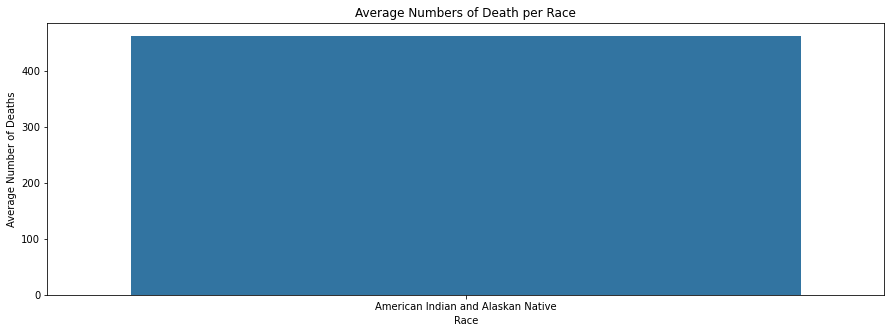

In [90]:
plot(heartUpdated)

## **Reflection**
#### o What is hardest part of the project that you’ve encountered so far?<br>
Applying and fitting a ML analysis that can assist in coming towards a conclusion on the hypothesis. Another interesting challenge has been pushing new code to the main branch as we have encountered numerous conflicts because of multiple group members working on the same notebook.
#### o What are your initial insights? <br>
Initial observations show that there are glimpses of significant changes but the graph numbers need to be supported in other ways. The only clear significant difference is in the heart data.
#### o Are there any concrete results you can show at this point? If not, why not? <br>
Hispanics and Asian/Pacific Islanders death averages from heart conditions are almost halved compared to the other races. In the stroke data those of African American descent have a higher death average than any of the other races but this needs to be explored more to see if it is a significant difference.
#### o Going forward, what are the current biggest problems you’re facing? <br>
The biggest challenge so far has been finding other ways to show significant changes in death rates using the data and support our initial EDA and visualization.
#### o Do you think you are on track with your project? If not, what parts do you need to dedicate more time to? <br>
We are on track with our project as we have seen some examples of variances in death rates between ethnicities. However, our approach needs to be trained more to have our data support each other.
#### o Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?<br>
Yes our data is worth proceeding with as we have found potential ways to support our analysis, the approach just needs to be more refined to show clear results supporting the hypothesis. Possible ways of doing this is to use more visualizations from different data categories such as splitting up the data by state and checking to see if certain ethnicities are more vulnerable in specific states.


## Next Steps 

##### What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.

Figure out how to use ML analysis effectively to complement and support our analysis and visualizations. If we can apply ML analysis to support out visualization then we will be confident that our project achieved its goals.

In [152]:
RaceCounter = {}
for row in strokeUpdated.iterrows():
    (index, loc) = row
    
    if loc['Race/Ethnicity'] in RaceCounter:
        (currSum, currDeath) = RaceCounter[loc['Race/Ethnicity']]
        currSum = currSum + 1
        currDeath = currDeath + loc['Deaths per 100,000']
        
        RaceCounter[loc['Race/Ethnicity']] = (currSum, currDeath)
    else: 
        RaceCounter[loc['Race/Ethnicity']] = (1, loc['Deaths per 100,000'])

# print(RaceCounter)

avgRace = {}
for key in RaceCounter:
    (divisor, numerator) = RaceCounter[key]
    # print(divisor)
    # print(numerator)
    tempAvg = numerator/divisor
    avgRace[key] = tempAvg

#print(avgRace)

output = []
for key in avgRace: 
    tempList = []
    tempList.append(key)
    tempList.append(avgRace[key])
    output.append(tempList)
#print(output)

avgDf = pd.DataFrame(output, columns =['Race', 'Average Number of Deaths'])
avgDf.head()

,Race,Average Number of Deaths
0,White,74.978916
1,Black,109.273453
2,Hispanic,57.702778
3,Asian and Pacific Islander,64.182379
4,American Indian and Alaskan Native,75.795798


Text(0.5, 1.0, 'Average Numbers of Death per Race (Stroke Data)')

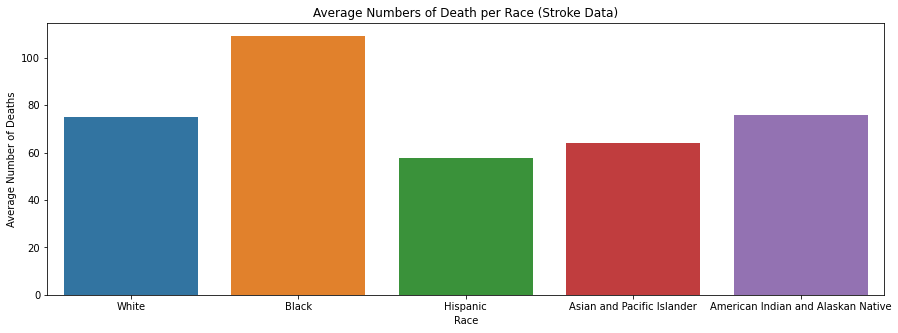

In [158]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
plot = sns.barplot(x = 'Race', y = 'Average Number of Deaths', data = avgDf)
plt.title("Average Numbers of Death per Race (Stroke Data)")